In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load video data.
video_data = np.loadtxt('video_data.txt')
frame_counter_raw = video_data[:, 0]
surface_video = video_data[:, 1]
frame_counter = frame_counter_raw + 30*(np.array(range(0, len(frame_counter_raw)))//30)
fps = 30
time_video = frame_counter/fps

In [3]:
def get_surface_level(phi_data):
    arc_length = phi_data[:, 0]
    arc_length = np.array(list(reversed(arc_length)))
    phi = phi_data[:, 1:]
    surface_level = []
    for i in range(phi.shape[1]):
        idx = ((phi[:, i]-0.5)**2).argmin()
        surface_level.append(arc_length[idx])
    return np.array(surface_level)

In [7]:
# Load initial single phi cutline data.
phi_data = np.loadtxt("phi_cutline.txt")
time_phi = np.linspace(0, 5, num=51, endpoint=True)
surface_phi = get_surface_level(phi_data)

# Load initial single phi cutline data.
phi_data2 = np.loadtxt("phi_cutline2.txt")
time_phi2 = np.linspace(0, 5, num=51, endpoint=True)
surface_phi2 = get_surface_level(phi_data2)

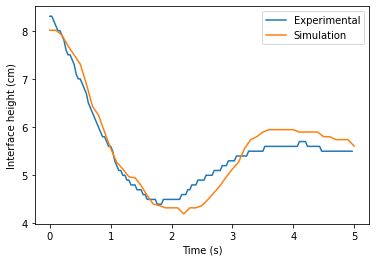

In [10]:
# Plotting
plt.plot(time_video, surface_video, label="Experimental")
#plt.plot(time_phi, surface_phi, label="Simulation 1" )
plt.plot(time_phi2, surface_phi2, label="Simulation" )
plt.xlabel("Time (s)")
plt.ylabel("Interface height (cm)")
plt.legend()
plt.show()